<a href="https://colab.research.google.com/github/amankrpandey1/cifar10_dataset/blob/main/CNN_Model_for_cifar_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing directories

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

##Importing DataSet

In [2]:
cifar10_class_names= {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}

In [3]:
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
xTrain.shape,xTest.shape,yTrain.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1))

##Viewing dataset

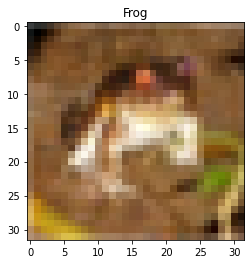

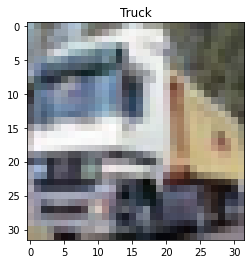

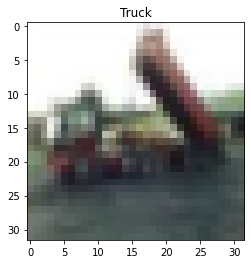

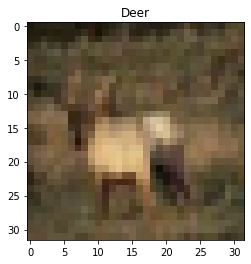

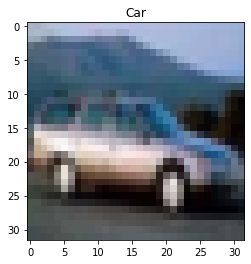

In [5]:
for i in range(5):
  sample_image = xTrain[i]
  image_class_number = yTrain[i][0]
  image_class_name = cifar10_class_names[image_class_number]

  plt.imshow(sample_image)
  plt.title(image_class_name)
  plt.show()


##normalizing the training dataset and as well as changing target variable into array so that it can be predict the prob for all the possible classes

In [6]:
xTrain = xTrain.astype('float32')/255
xTest = xTest.astype('float32')/255
xTrain[0],xTest[0]

(array([[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],
 
        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],
 
        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],
 
        ...,
 
        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333

In [7]:
yTrain = tf.keras.utils.to_categorical(yTrain,10)
yTest = tf.keras.utils.to_categorical(yTest,10)

yTrain[0],yTest[0]

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32))

Model Creattion

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu",input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=510,activation="relu"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [9]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [10]:
hisotry = model.fit(xTrain,
          yTrain,
          batch_size=32,
          epochs=30,
          validation_data=(xTest,yTest),
          shuffle=True)

Epoch 1/30
1563/1563 [==============================] - 18s 6ms/step - loss: 1.4810 - accuracy: 0.4606 - val_loss: 1.1452 - val_accuracy: 0.5925
Epoch 2/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0891 - accuracy: 0.6129 - val_loss: 0.9503 - val_accuracy: 0.6643
Epoch 3/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9326 - accuracy: 0.6720 - val_loss: 0.8301 - val_accuracy: 0.7051
Epoch 4/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8340 - accuracy: 0.7046 - val_loss: 0.8010 - val_accuracy: 0.7217
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7503 - accuracy: 0.7338 - val_loss: 0.7430 - val_accuracy: 0.7416
Epoch 6/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6860 - accuracy: 0.7587 - val_loss: 0.7298 - val_accuracy: 0.7471
Epoch 7/30
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6342 - accuracy: 0.7745 - val_loss: 0.7166 - val_accura

In [11]:
model_structure = model.to_json()
with open("model_structure.json","w") as f:
  f.write(model_structure)
f.close()

In [12]:
model.save_weights("model_weights.h5")

In [13]:
f = Path("model_structure.json")
model_structure = f.read_text()
model_structure

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 32, 32, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 32, 32, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Conv2D", "config": {"name": "conv2d_1", "trainable": true, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid

In [14]:
model = tf.keras.models.model_from_json(model_structure)
model

In [15]:
model.load_weights("model_weights.h5")

In [16]:
def model_predict(img="frog.png",model={}):

  img = tf.keras.preprocessing.image.load_img(img,target_size=(32,32)) ##loading image
  image_to_test = tf.keras.preprocessing.image.img_to_array(img) /255 ## normalizing image

  list_of_images = np.expand_dims(image_to_test,axis=0) ##expanding dims to make it compatible with batch size(batch size,w,h,channels)
  results = model.predict(list_of_images) ##model prediction
  single_result = results[0] 
  most_likely_class_index = np.argmax(single_result) #index with highest prob
  class_likelyhood = single_result[most_likely_class_index] #index of class

  class_label = cifar10_class_names[most_likely_class_index] #name of class

  print("This image is of {} - with confidence: {:.2f}".format(class_label,class_likelyhood))

In [17]:
model_predict("frog.png",model)

1/1 [==============================] - 0s 180ms/step
This image is of Frog - with confidence: 0.92
